 Привет.
 
Я понимаю что многие ответы мог бы найти сам,а многое должен был запомнить, но все затянулось и начинаю отставать,поэтому попрошу помощи у тебя и пока проэкт на проверке займусь ими,и буду ждать твоих ответов.Так же поздно заметил и этим еще и запутался что делать на данном этапе и немного залез на следующий...

<div style="border:solid Chocolate 2px; padding: 40px">

<b>Александр, привет!👋</b>

Меня зовут Ольга Бессолицына, тимлид, я буду проверять эту (как наверное и все) части твоего проекта. 

Пожалуйста, не удаляй мои комментарии, они будут особенно полезны для нашей работы в случае повторной проверки проекта. 

Ты можешь найти мои комментарии, обозначенные <font color='green'>зеленым</font>, <font color='gold'>желтым</font> и <font color='red'>красным</font> цветами, например:

<br/>

<div class="alert alert-success">
<h2> Комментарий тимлида <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> В случае, если решение на отдельном шаге является полностью правильным.
</div>

<br/>

<div class="alert alert-warning">
    <h2> Комментарий тимлида <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> В случае, когда решение на отдельном шаге станет еще лучше, если внести небольшие коррективы.
</div>


<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий тимлида <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
 В случае, когда решение на отдельном шаге требует существенной переработки и внесения правок. Напоминаю, что проект не может быть принят с первого раза, если ревью содержит комментарии, рекомендующие доработать шаги.
</div>
    
    
Сейчас со всем разберемся, помни, что дедлайны рекомендованые, так что не переживай :)

<div class="alert alert-info" role="alert">
В таком поле помечу,где у меня возникла проблема
</div>

# Телеком: исследование оттока клиентов

### Нам предстоит построить модель, которая поможет предсказать уход клиента. Заказчик предоставил нам данные и ждет классного результата.
Описание полей данных:

BeginDate – дата начала пользования услугами,

EndDate – дата окончания пользования услугами,

Type – тип договора: ежемесячный, годовой и т.д,

PaperlessBilling – факт выставления счёта на электронную почту,

PaymentMethod – способ оплаты,

MonthlyCharges – ежемесячные траты на услуги,

TotalCharges – всего потрачено денег на услуги,

Dependents – наличие иждивенцев,

Senior Citizen – наличие пенсионного статуса по возрасту,

Partner – наличие супруга(и),

MultipleLines – наличие возможности ведения параллельных линий во время звонка.

<div class="alert alert-success">
<h2> Комментарий тимлида <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>
 Молодец, что не забываешь про заголовок и описание, это важно, так и самому удобнее работать, когда они всегда на виду, так и другим будет проще понять, что происходит в твоей тетради :)
</div>

 План:

-- Загрузим данные,проверим пропуски,дубликаты.Проведем предобработку.

-- Проанализируем поведение клиентов,посмотрим на кореляцию.

-- Подготовим данные для обучения модели,разделим датасеты и подготовим признаки.

-- Обучим несколько моделей с кросс-валидацией,выберем лучшую по roc-auc проведем финальный тест на accuracy.

<div class="alert alert-success">
<h2> Комментарий тимлида <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>
хорошо, принимается. Можно было упомянуть еще про кросс-валидацию и какую метрику используешь

## Подготовка данных

In [4]:
pip install phik

     |████████████████████████████████| 709 kB 1.2 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import phik
import seaborn as sns
from datetime import datetime

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.metrics import roc_auc_score,make_scorer,accuracy_score

from catboost import CatBoostRegressor
from catboost import CatBoostClassifier
pd.options.mode.chained_assignment = None

In [6]:
try:
    contract = pd.read_csv('contract.csv')
    internet = pd.read_csv('internet.csv')
    personal = pd.read_csv('personal.csv')
    phone = pd.read_csv('phone.csv')
except:
    contract = pd.read_csv('/datasets/final_provider/contract.csv')
    internet = pd.read_csv('/datasets/final_provider/internet.csv')
    personal = pd.read_csv('/datasets/final_provider/personal.csv')
    phone = pd.read_csv('/datasets/final_provider/phone.csv')

<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий тимлида <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b> ошибка, нужно прописать загрузку не только с локального компьютера. Рекомендую использовать try-except

<div class="alert alert-success">
<h2> Комментарий тимлида v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> исправлено, хорошо

Проверяем данные на содержимое и необходимости в предобработке

In [7]:
contract.info()
contract.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


Преобразуем столбцы в float,дату преобразуем позже,для удобноства она нужна в том виде в котором сейчас есть.

In [8]:
contract['MonthlyCharges'].astype('float64')
try:
    contract['TotalCharges'].astype('float64') # Данный код дал нам ошибку с подсказкой на неявкые пропуски
except:
    contract.query('TotalCharges <= "1"')

В данном случае мы нашли неявные пропуски,обратим внимание что во всех случаях у нас дата заключения контракта совпадает с датой выгрузки,эти данные не несут полезной информации.

Удаляем такие пропуски. 

<div class="alert alert-success">
<h2> Комментарий тимлида v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> ок, один из возможных вариантов

In [9]:
contract = contract.query('TotalCharges > "1"')
contract['TotalCharges'] = contract['TotalCharges'].astype('float64')
contract.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   BeginDate         7032 non-null   object 
 2   EndDate           7032 non-null   object 
 3   Type              7032 non-null   object 
 4   PaperlessBilling  7032 non-null   object 
 5   PaymentMethod     7032 non-null   object 
 6   MonthlyCharges    7032 non-null   float64
 7   TotalCharges      7032 non-null   float64
dtypes: float64(2), object(6)
memory usage: 494.4+ KB


In [10]:
internet.info()
internet.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


In [11]:
personal.info()
personal.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [12]:
personal['SeniorCitizen'] = personal['SeniorCitizen'].astype('int8') #Аналогичто преобразуем в int8 

In [13]:
phone.info()
phone.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


In [14]:
all_datas = [contract,internet,personal,phone] #Создаем список датасетов и проверяем явные дубликаты и пропуски
for data in all_datas:
    print('Вывод пропусков и дубликатов,если они есть:')
    list_duplicated = data.duplicated().sum()
    if list_duplicated > 0:
        print(list_duplicated)
    list_isna = data.isna().sum()
    for row in list_isna:
        if row > 0:
            print(list_isna[row])

Вывод пропусков и дубликатов,если они есть:
Вывод пропусков и дубликатов,если они есть:
Вывод пропусков и дубликатов,если они есть:
Вывод пропусков и дубликатов,если они есть:


<div class="alert alert-warning">
    <h2> Комментарий тимлида <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> тут был бы кстати небольшой вывод, о пропусках в датесетах, все ли хорошо с типами данных и тп.

<div class="alert alert-info" role="alert">
V2 Доработал изменением типов данных под каждым датасетом
</div>

<div class="alert alert-success">
<h2> Комментарий тимлида v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> хорошо

<div class="alert alert-info" role="alert">
Последующие строки работают,но работают очень медленно,даже на данном датасете.Я почти уверен что я не понял как этим пользоваться.
</div>

In [15]:
#%% time
#contract.global_phik()

<div class="alert alert-success">
<h2> Комментарий тимлида <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> phik работает не быстро, расчитывая все веса, это нормально, но функцию используем не global_phik и корреляции нужно рассчитывать после объединения датасетов и удаления временных признаков. Пример ниже
    
<code>phik_overview = (df.phik_matrix().round(2))
plt.figure(figsize=(16,10))
sns.heatmap(phik_overview, annot=True)
plt.title('Матрица корреляции', fontsize=14)
sns.set(font_scale=1.2)
plt.show()
</code> 

## Анализ данных

Разделим клиентов на нынешних и ушедших по дате закрытия договора и посмотрим распределение по платежам,нас интересует 1,2,3 квантили,медиана,среднее,минимальные и максимальные платежи.

In [16]:
#Отделим ушедших клиентов
contract_end = contract.query('EndDate != "No"')
contract_now = contract.query('EndDate == "No"')

<div class="alert alert-info" role="alert">
Требуется совет:
    
Похожий результат как в ячейке ниже если я правильно помню можно получить готовым методом а не прописывать всё ручками.

Если я оставлю для гитхаба код в таком виде,такое решение может рассматриваться как умение искать альтернативные пути или чтото в этом роде.Или же это только показывает на сколько я чайник?
</div>

<div class="alert alert-success">
<h2> Комментарий тимлида <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> ты наверно про метод describe говоришь. Я бы рекомендовала все таки использовать его :) Результат такой же, а строчка кода одна

In [17]:
contract_describe = pd.DataFrame([contract_now['MonthlyCharges'].describe(),contract_end['MonthlyCharges'].describe()]).T
contract_describe.columns = ['now_MonthlyCharges','end_MonthlyCharges']
contract_describe

,now_MonthlyCharges,end_MonthlyCharges
count,5163.000000,1869.000000
mean,61.307408,74.441332
std,31.094557,24.666053
min,18.250000,18.850000
25%,25.100000,56.150000
50%,64.450000,79.650000
75%,88.475000,94.200000
max,118.750000,118.350000


<div class="alert alert-success">
<h2> Комментарий тимлида v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍</b>

По распределению видим,те кто отказался от услуг,платили больше,в первом квантиле особо заметна большая разница в несколько раз.При это действующие клиенты принесли в несколько раз больше прибыли,чем те кто платил больше и в результате отказался от услуг.

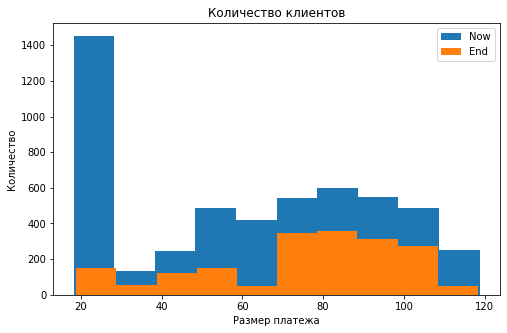

In [18]:
contract_now['MonthlyCharges'].plot(kind='hist', figsize=(8,5))
contract_end['MonthlyCharges'].plot(kind='hist', figsize=(8,5))
plt.title('Количество клиентов') 
plt.ylabel('Количество') 
plt.xlabel('Размер платежа')
plt.legend(['Now', 'End']);

In [ ]:
contract_now['MonthlyCharges'].plot(kind='hist', figsize=(8,5))
contract_end['MonthlyCharges'].plot(kind='hist', figsize=(8,5))
plt.title('Количество клиентов') 
plt.ylabel('Количество') 
plt.xlabel('Размер платежа')
plt.legend(['Now', 'End']);

<div class="alert alert-success">
<h2> Комментарий тимлида <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> а вот тут супер! хорошо, что визуализируешь данные в разбивке по таргету, показательно. И за вывод плюс.

По графику видим что большая часть клиентов все так же пользуется услугами.
Отменим,что количество действующих клиентов в малоплатежной группе в разы больше,чем в любой другой.Обратим внимание что следущая группа по размеру платежей меньше всех остальных,возможно те кто попробовали для что-то новое,заинтересовались и другими услугами.

Большинство клиентов отказавшихся от услуг,это клиенты с платежами ~70-110.Возможно это наша потенциальная группа на которую следует ориентировться.

Разберем данные подробнее,учитывая резкий спад в группе с платежами (30-40) и дальнейший подьем, возможно стоит порекомендовать заказчику проведение индивидуальных предложений с бесплатным\льготным периодом для клиентов с платежами менее ~30,таким образом ознакомить и привлечь клиентов на более расширеные тарифы.

Посмотрим отдельно на пользователей телефонии и интернета,в каждой из предыдущих групп отдельно.

In [19]:
contract_now_phone = pd.merge(phone, contract_now)
contract_now_internet = pd.merge(internet, contract_now)
contract_end_phone = pd.merge(phone, contract_end)
contract_end_internet = pd.merge(internet, contract_end)
contract_now_phone

,customerID,MultipleLines,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,5575-GNVDE,No,2017-04-01,No,One year,No,Mailed check,56.95,1889.50
1,1452-KIOVK,Yes,2018-04-01,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40
2,6388-TABGU,No,2014-12-01,No,One year,No,Bank transfer (automatic),56.15,3487.95
3,9763-GRSKD,No,2019-01-01,No,Month-to-month,Yes,Mailed check,49.95,587.45
4,7469-LKBCI,No,2018-10-01,No,Two year,No,Credit card (automatic),18.95,326.80
...,...,...,...,...,...,...,...,...,...
4648,8456-QDAVC,No,2018-07-01,No,Month-to-month,Yes,Bank transfer (automatic),78.70,1495.10
4649,2569-WGERO,No,2014-02-01,No,Two year,Yes,Bank transfer (automatic),21.15,1419.40
4650,6840-RESVB,Yes,2018-02-01,No,One year,Yes,Mailed check,84.80,1990.50
4651,2234-XADUH,Yes,2014-02-01,No,One year,Yes,Credit card (automatic),103.20,7362.90


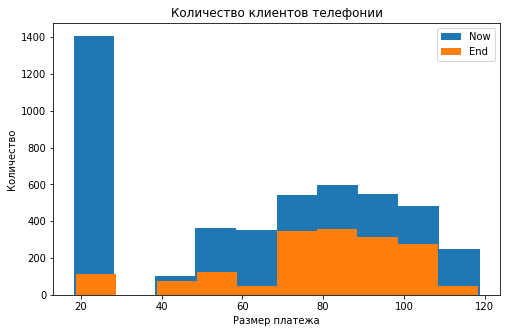

In [20]:
contract_now_phone['MonthlyCharges'].plot(kind='hist', figsize=(8,5))
contract_end_phone['MonthlyCharges'].plot(kind='hist', figsize=(8,5))
plt.title('Количество клиентов телефонии') 
plt.ylabel('Количество') 
plt.xlabel('Размер платежа')
plt.legend(['Now', 'End']);

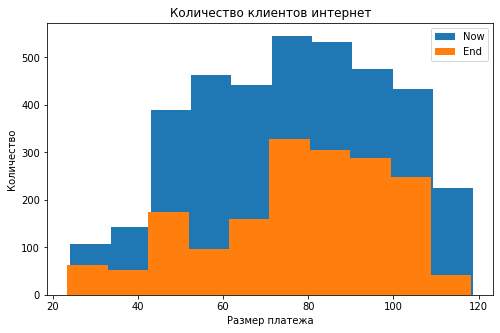

In [21]:
contract_now_internet['MonthlyCharges'].plot(kind='hist', figsize=(8,5))
contract_end_internet['MonthlyCharges'].plot(kind='hist', figsize=(8,5))
plt.title('Количество клиентов интернет') 
plt.ylabel('Количество') 
plt.xlabel('Размер платежа')
plt.legend(['Now', 'End']);

#### < Телефония >

По графикe можем заметить,что большая часть клиентов платит за телефон,это был наш пик и доля отказавшихся здесь очень мала.
Для задачи оттока клиентов больше всего нас интересуют группы с платежами ~40-50 и ~70-110,в данных случаях доля отказов больше полоивны.

#### < Интернет >

Клиенты с платежами ~20-30, ~70-110 уходили чаще.Реже уходили при платежах ~50-60 и ~110+.

#### < Общее впечатление >

На данный момент выделим что во всех случаях нужно обратить внимание на группы с платежами ~70-110,данный сектор отказывается от услуг довольно часто.

<div class="alert alert-info" role="alert">
Код ниже не сработал,с ошибкой нельзя обединить типы инт и обьект.Не понял как это работает,но косательно обьединений часто сталкиваюсь с проблемами такого рода.
</div>

Обьединим все данные и подготовим признаки для модели.

In [22]:
df_1 = contract.merge(personal,on='customerID',how='left')
df_2 = df_1.merge(internet,on='customerID',how='left')
full_data = df_2.merge(phone,on='customerID',how='left')
full_data.isna().sum()

customerID             0
BeginDate              0
EndDate                0
Type                   0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
InternetService     1520
OnlineSecurity      1520
OnlineBackup        1520
DeviceProtection    1520
TechSupport         1520
StreamingTV         1520
StreamingMovies     1520
MultipleLines        680
dtype: int64

<div class="alert alert-success">
<h2> Комментарий тимлида <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> верно, данные не потеряли

Пропуски образовались в результате того что не все,пользуются интернетом и телефонией одновременно.Логично заполнить "No",если корневая услуга отсутствует.

In [23]:
full_data = full_data.fillna('No')
full_data.isna().sum()

customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
MultipleLines       0
dtype: int64

<div class="alert alert-success">
<h2> Комментарий тимлида <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> согласна. Такое заполнение здесь оптимально

Создадим новый признак: суммарная продолжительность всех контрактов и уберем даты из датасета

In [24]:
full_data['EndDate'] = full_data['EndDate'].replace('No','2020-02-01')
full_data['EndDate'] = pd.to_datetime(full_data['EndDate'])
full_data['BeginDate'] = pd.to_datetime(full_data['BeginDate'])
full_data['days'] = (full_data['EndDate']-full_data['BeginDate']).dt.days
full_data = full_data.drop(['BeginDate','customerID'],axis = 1)

<div class="alert alert-success">
<h2> Комментарий тимлида <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> верно, есть полезный признак

Приведем категориальные признаки в бинарный вид.

<div class="alert alert-info" role="alert">
V3 
    
Код сработал но выдал предупреждение,да и выгдяит не важно.Подскажешь более разумное и аккуратное решение которое я не нашел?
</div>

In [25]:
full_data_binar = full_data.copy()
full_data_binar['InternetService'] =  full_data_binar['InternetService'].replace('No','Not')# Данная замена нужна чтобы не потерять категорию при кодировании
full_data_binar = full_data_binar.replace('No',0)
full_data_binar = full_data_binar.replace('Yes',1)
full_data_binar['EndDate'].loc[full_data_binar['EndDate'] == '2020-02-01'] = 0
full_data_binar['EndDate'].loc[full_data_binar['EndDate'] != 0] = 1

 <div class="alert alert-success">
<h2> Комментарий тимлида v.3 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> можно воспользоваться для бинарных признаков отдельно get_dummies и указать атрибут drop_first= True. 
    
Ругается потому что ты меняешь существующий срез данных. Можно прописать после импортов `pd.options.mode.chained_assignment = None` или перписать код с выделением отдельных срезов (пример - https://www.codecamp.ru/blog/pandas-settingwithcopywarning/)

<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий тимлида <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
    
С бинарными - все хорошо, по поводу категориальных и ohe.
    
Кодирование корректно проводить после разбиения на подвыборки, в реальности возможна ситуация, когда модель столкнётся с новой категорией, например, заказчик ввел новый тип интернет-соединения, по спутнику :) Модель должна быть готова к таким раскладам. В нашей задаче и с выбранным типом кодирования это не так критично, но, всё-таки, обрати на этот момент внимание.

P.S.: Если для кодирования используем get_dummies, то стоит после кодирования проверять порядок и наличие всех колонок в обучающей и тестовой выборке(train.columns == test.columns), чтобы избежать проерки можно использовать OneHotEncoder. В этой задаче это не показательно, но давай сделаем правильно

<div class="alert alert-info" role="alert">
Здесь вообще не понял как это работает,в гугле тоже подобного не нашел.Попробую описать как я это понимаю,скажи где я ошибся:
    
-- Если появляется новое значение(например соединение по спутнику),то код создает доп признак для него,и модель в обучении учтет его.
    
-- Аналогично с порядком,если кодирую до разбивки, я надежно получаю все признаки во сделаных воборках после.Если же кодирование сделаю после разбиения, то нового значения (возможно из-за чего оно будет редким) может и вовсе не оказаться в одной из выборок.И что делать если количство колонок не совпало?(удалять не совпавшие?)
    
-- OneHotEncoder из преимуществ от get_dummies нашел только скорость работы,как это решает вопрос проверки соответствия колонок не нашел.
</div>

<div class="alert alert-success">
<h2> Комментарий тимлида v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> мы эмитируем этап отложенной выборки (что было бы если бы тестовую не знали совсем), поэтому хорошо бы сделать как на бою и преобразовать данные отдельно - а это значит отдельно для трейн и для тест, а дальше посмотреть все ли хорошо с порядком и наличием всех признаков. 
    
get_dummies преобразует выборку по всем стоблцам и значениям какие там есть, поэтому могут не совпасть трейн и тест (важно этот момент проверить). OneHotEncoder обучается (fit) на трейн, а дальше преобразуем трейн и тест (transform) в соответствии с обученным (то есть точно порядок и соответствие будет как в трейн, и можно проверку дополнительно не делать).

Проверим кореляцию между признаками,на хитмапе

interval columns not set, guessing: ['PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen', 'Partner', 'Dependents', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines', 'days']


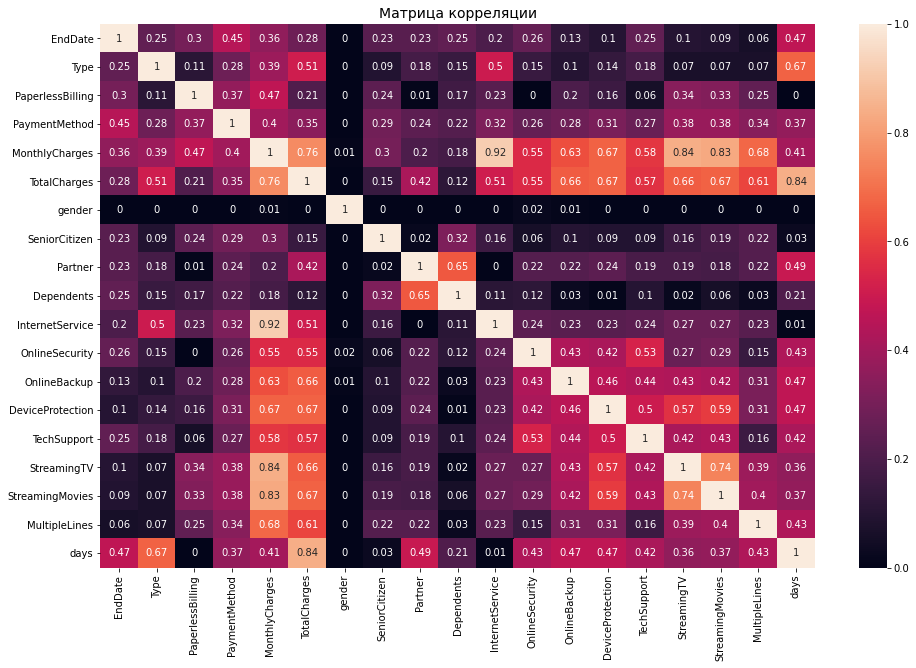

In [26]:
phik_overview = (full_data_binar.phik_matrix().round(2))
plt.figure(figsize=(16,10))
sns.heatmap(phik_overview, annot=True)
plt.title('Матрица корреляции', fontsize=14)
sns.set(font_scale=1.2)
plt.show()

<div class="alert alert-info" role="alert">
V3 
    
Тут немного растерялся,для нас важно обратить внимание на связь целевого признака со всеми остальными и ожидал что придется удалять некоторые признаки(например размер месячного платежа и что с ним напрямую связано)
    
связь менее 0.5 считается не очень сильной и предположу что никакие признаки удалять не стоит,и данная карта поможет только сделать выводы и рекомендации для заказчика.
</div>

Сильной связи с целевым признаком нет,общий дата-сет подготовлен.

Отметим что:

--Есть небольшая связь ухода клиента с сроком пользования,те кто пользуется услугами дольше,реже уходят.

--Так же разумно было предположить уход клиента может быть связан с тем,сколько он платит.Связь есть,но она небольшая.

--Не всем нравится платежные способы,возможно заказчику это будет интересно.

--Пол никак не отражает характер пользователей.В данной колонке не имеет смысла искать никакие аналитические закономерности.

<div class="alert alert-success">
<h2> Комментарий тимлида v.3 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Хорошо, что разобрался с использованием PHIK - отличное решение :)
        
Важно не только смотреть корреляцию с таргетом и но и между признаками. Сильная связь - более 0.8. Тут есть такие признаки и они вполне логично связаны (к примеру общие траты и число дней - дольше пользуешься, больше платишь суммарно). Признаки с высокой корреляцией стоит удалять только для линейных моделей. Для всех остальных можно оставить и смотреть важность - после этого решать об удалении.
        
На будущее, полезные ссылки - проверка важности признаков по модели это только один из способов (корреляция в том числе). Используют также аналитические методы проверки гипотез. 

Есть несколько инструментов для отбора признаков, подробнее можно посмотреть в данной статье (Отбор признаков в задачах машинного обучения): https://habr.com/ru/post/550978/

В библиотеке sklearn есть методы mutual_info_regression и mutual_info_classif соответственно для регрессии и классификации.
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html#sklearn.feature_selection.mutual_info_classif
</div>       


## Модель

Для начала посмотрим на баланс классов.

In [27]:
print('Доля действующих клиентов:',full_data_binar.query('EndDate == 0').shape[0] / full_data_binar.shape[0])

Доля действующих клиентов: 0.7342150170648464


Большая часть клиентов действующие,для баланса будем ориентироваться на 1 к 4.

Далее подготовим и поделим данные на выборки.Воспользуемся OneHotEncoder.

In [28]:
X = full_data_binar.drop('EndDate',axis=1)
y = full_data_binar['EndDate'].astype('int8') # преобразуем обьекты в инт
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 311022,test_size = .25,stratify=y)

<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий тимлида  v.3<a class="tocSkip"></h2>

    
<b>На доработку🤔:</b> здесь и далее по коду выборки делим в отношении 75/25. У нас небольшая выборка, обучение лишь на половине значений может понизить качество. 

<div class="alert alert-info" role="alert">
V4

Исправил
</div>

<div class="alert alert-success">
<h2> Комментарий тимлида v.4 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> хорошо

<div class="alert alert-warning">
    <h2> Комментарий тимлида  v.3<a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> здесь и далее по коду
     
1) тк у в данных дисбаланс, то рекомендую использовать атрибут stratify - он позволит разбить данные на трайн и тест при этом сохранив баланс классов.
        
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
    
2) выделение валидационной выборки при кросс-валидации излишне, нужна только обучающая и тестовая. Про кросс-валидацию - https://ml-handbook.ru/chapters/cross_validation/intro

<div class="alert alert-info" role="alert">
V4

Исправил
</div>

<div class="alert alert-success">
<h2> Комментарий тимлида v.4 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> отлично

In [29]:
class_list = ['Type','PaymentMethod','InternetService','gender']
transformer = make_column_transformer(
    (OneHotEncoder(), class_list),
    remainder='passthrough')
transformed = transformer.fit_transform(X_train)
X_train_ohe = pd.DataFrame(
    transformed, 
    columns=transformer.get_feature_names())
transformed = transformer.transform(X_test)
X_test_ohe = pd.DataFrame(
    transformed, 
    columns=transformer.get_feature_names())
print(X_train_ohe.shape,y_train.shape)# Проверяем размер выборок
print(X_test_ohe.shape,y_test.shape)

(5274, 26) (5274,)
(1758, 26) (1758,)


<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий тимлида v.3 <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b> мысль верная, только мы должны обучить transformer на обучающей выборке (fit), а тестовую только преобразовать - transform (если оставишь валидационную, то тоже только преобразовать). Сейчас у тебя на каждой из выборок обучается свой transformer

<div class="alert alert-info" role="alert">
V4

Исправил
</div>

<div class="alert alert-success">
<h2> Комментарий тимлида v.4 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> теперь верно

Далее обучаем несколько моделей: RandomForestClassifier и CatBoostClassifier.

Для обучения будем использовать метрику roc auc, для финального теста воспользуемся accuracy.

In [30]:
%%time
parametrs = { 'n_estimators': range (10, 101, 10),
              'max_depth': range (1,13, 2)
            }
RFC = RandomForestClassifier(random_state = 311022, class_weight = "balanced") # модель с балансом классов
grid = GridSearchCV(RFC, parametrs, cv=5,scoring= 'roc_auc') # подбор параметров
grid.fit(X_train_ohe, y_train)
best_params_RFC = grid.best_params_
print(best_params_RFC)
pred_RFC = grid.predict_proba(X_train_ohe)

{'max_depth': 7, 'n_estimators': 30}
CPU times: user 49 s, sys: 249 ms, total: 49.3 s
Wall time: 49.3 s


In [31]:
%%time
grid = { 
    'n_estimators': [200,300,400,500],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy'],
    'random_state' : [311022]
}
rf_cv = GridSearchCV(estimator=RandomForestClassifier(), param_grid=grid, cv= 5,scoring='roc_auc')
rf_cv.fit(X_train_ohe, y_train)
best_params_RC = rf_cv.best_params_
print(rf_cv.best_params_)
print(rf_cv.best_score_)

{'criterion': 'gini', 'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 200, 'random_state': 311022}
0.8615267787566279
CPU times: user 6min 31s, sys: 1.9 s, total: 6min 33s
Wall time: 6min 33s


Площадь кривой на модели RandomForestClassifier: 0.86.

Попробуем обучить CatBoostClassifier.

Данная модель способна работать с классами,подадим ей не закодированные данные.

<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий тимлида  v.3<a class="tocSkip"></h2>

    
<b>На доработку🤔:</b> Здесь и далее по коду
    
1) make_scorer здесь излишне, его применяют, когда нужно использовать кастомные метрики, здесь у нас стандартная. Сейчас make_scorer работает неверно, тк roc_auc_score принимает вероятность класса (predict_proba), а make_scorer работает с метками класса (predict). Можно просто указать scoring = 'roc_auc' в GridSearchCV
    
2) roc_auc_score принимает вероятность класса (predict_proba), a не с метками класса (predict). У тебя сейчас занижается качество модели
    
3) не задан random_state

<div class="alert alert-info" role="alert">
V4

Исправил
</div>

<div class="alert alert-success">
<h2> Комментарий тимлида v.4 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> теперь по обучению хорошо

In [32]:
X = full_data_binar.drop('EndDate',axis=1).astype('str') # Преобразум все float в категории
y = full_data_binar['EndDate'].astype('int8') 
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 311022,test_size = .25)
cat_features = np.where(X.dtypes != float)[0]

<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий тимлида  v.3<a class="tocSkip"></h2>

    
<b>На доработку🤔:</b> см комментарии выше

<div class="alert alert-info" role="alert">
V4

Исправил
</div>

<div class="alert alert-success">
<h2> Комментарий тимлида v.4 <a class="tocSkip"> </h2>

<b>Все отлично!👍</b>

<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий тимлида  v.3<a class="tocSkip"></h2>

    
<b>На доработку🤔:</b> нужен подбор гиперпараметров или ты его уже делал и получились такие результаты? нужно исправить расчет roc_auc_score с predict_proba (хотя при использовании GridSearchCV и указании scoring = 'roc_auc' можно вывести .best_score_

<div class="alert alert-info" role="alert">
V4

Исправил ниже.
</div>

<div class="alert alert-warning">
    <h2> Комментарий тимлида  v.3<a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> обычно у CatBoostClassifier подбирают 'learning_rate', 'depth', 'l2_leaf_reg'. custom_loss не участвует в обучении, она просто выводится как доп.метрика. class_weight я бы рекомендовала тогда подбирать с учетом дисбаланса как class_weight: ['balanced', None]

Площадь и accuracy почти 0.86 уже неплохой результат,стоит запустить нашу модель на финальный тест.


<div class="alert alert-info" role="alert">
 V3
    
Очень долго искал решения как получить от CatBoostClassifier auc > 0.8.В процессе наткнулся на примеры где использовали CatBoostRegressor с данными классификации.
Ниже попробовал применить ее у себя,классически считал регрессия не для классификаций но возник ряд вопросов:
    
-- При первой попытке не трогая параметры получил auc 0.91 (Так понимаю ответы вылазиют за диапазон(0-1) и модель как бы фиктивно выбирает лучшую площадь из вариантов внутри диапазона)
    
-- Понятно что на Accuracy правильных ответов почти не будет,но поскольку нашел что-то у других но не поняв что,предположу что есть инструменты преобразующие ответы в диапазон(0-1) например на основе округления и выбора порога от 0-1.
    
-- Правильно-ли,продуктивно-ли таким пользоваться если,это возможно?
</div>

<div class="alert alert-success">
<h2> Комментарий тимлида  v.3<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>
    
- можно подумать о таком исследовании, если классификация не дает хороших результатов (тебе нужно подкорректировать модель и думаю результат будет хороший). Обычно задачи из одного типа в другой не переводят, а ищут другие решение внутри типа (те для бинарной классификации). Например смотрят более сложные модели бегинги, ансамбли, нейронные сети и тп. 
    
- Ставят порог по умолчанию в 0.5. Все, что больше = 1, меньше = 0. И уже исходя из этих меток считают accuracy.
   

In [33]:
%%time
cat = CatBoostClassifier()
parameters = {'depth'         : [2,6,10],
             'learning_rate' : [0.01,0.03,0.05],
              'iterations'    : [10,50,100],
              'random_seed'  : [311022],
              'loss_function': ['Logloss'],
              'boosting_type' : ['Ordered'],
              'bootstrap_type':['Bernoulli']
             }
Grid_cat = GridSearchCV(estimator=cat, param_grid = parameters, cv = 2, n_jobs=-1)
Grid_cat.fit(X_train, y_train,
            cat_features = cat_features)
best_params_cat = Grid_cat.best_params_ 
print(Grid_cat.best_params_)
print(Grid_cat.best_score_);

0:	learn: 0.6878373	total: 49.6ms	remaining: 446ms
1:	learn: 0.6821939	total: 51.7ms	remaining: 207ms
2:	learn: 0.6773165	total: 53.4ms	remaining: 125ms
3:	learn: 0.6719487	total: 54.8ms	remaining: 82.2ms
4:	learn: 0.6666202	total: 56.2ms	remaining: 56.2ms
5:	learn: 0.6616339	total: 57.6ms	remaining: 38.4ms
6:	learn: 0.6565043	total: 59ms	remaining: 25.3ms
7:	learn: 0.6516417	total: 60.4ms	remaining: 15.1ms
8:	learn: 0.6469692	total: 61.7ms	remaining: 6.86ms
9:	learn: 0.6422546	total: 63.1ms	remaining: 0us
0:	learn: 0.6871405	total: 2.08ms	remaining: 18.7ms
1:	learn: 0.6813974	total: 4.05ms	remaining: 16.2ms
2:	learn: 0.6757156	total: 5.92ms	remaining: 13.8ms
3:	learn: 0.6701433	total: 7.27ms	remaining: 10.9ms
4:	learn: 0.6647499	total: 8.54ms	remaining: 8.54ms
5:	learn: 0.6596685	total: 9.93ms	remaining: 6.62ms
6:	learn: 0.6548651	total: 11.3ms	remaining: 4.86ms
7:	learn: 0.6495347	total: 12.6ms	remaining: 3.16ms
8:	learn: 0.6446643	total: 13.9ms	remaining: 1.54ms
9:	learn: 0.6396806	

<div class="alert alert-info" role="alert">
V4

Дисбаланс указать не получилось,код падает с ошибкой,но и без него метрика auc: 0.9
</div>

<div class="alert alert-success">
<h2> Комментарий тимлида v.4 <a class="tocSkip"> </h2>

<b>Все отлично!👍</b>

In [34]:
pred = Grid_cat.predict(X_test)
accuracy = accuracy_score(y_test,pred)
print('Accuracy:',accuracy)
pred = Grid_cat.predict_proba(X_test)
pred = pred[:, 1]
roc_auc = roc_auc_score(y_test,pred)
print('ROC AUC:',roc_auc)

Accuracy: 0.9055745164960182
ROC AUC: 0.9457875550819146


<div class="alert alert-info" role="alert">
V4

Все что я понял что predict_proba возвращает 2х мерный массив вероятностей между 0-1,который в accuracy не засунуть,поэтому пока написал так.
</div>

<div class="alert alert-success">
<h2> Комментарий тимлида v.4 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> для accuracy нужно отдельно считать прогнозы с predict, у тебя верно прописано

<div class="alert alert-info" role="alert">
V3
    
Не ожидал результата на тесте лучшего чем на валидации,ошибок и утечек не нашел.Это корректный результат? Как использовать это в выводе?
</div>

<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий тимлида  v.3<a class="tocSkip"></h2>

    
<b>На доработку🤔:</b> тут такая же ошибка как выше с roc_auc_score. Результат на тесте может быть чуть выше, это нормально. Вот если бы у тебя было на порябок качество выше, то тут логично заподозрить ошибку.

<h2>✔️ Заключение тимлида: <a class="tocSkip"> </h2> 
    
<b>Александр</b>, на этом шаге я оцениваю план работы и первичный анализ. Дальше пока не в счет - это при след.задании в трекере. Поэтому исправить пожалуйста загрузку датасетов. Над остальными комментариями можно попработать позже:)

<div class="alert alert-info" role="alert">
V3
    
Загрузку поправил, дальше пока не в счет,но мне поможет если ответишь на вопросы особенно на те что возникли на этапе кодирования
</div>

<div style="border:solid Chocolate 2px; padding: 40px"><h2>✔️ Заключение тимлида v.2: <a class="tocSkip"> </h2> 
    
<b>Александр</b>, теперь хорошо, можно приступать к коду

<div class="alert alert-info" role="alert">
V3    
    
Вывод пока,что не стал расписывать,т.к. не сделал анализ модели.Подобное либо мы не проходили,либо как-то оно прошло мимо меня.Данный проэкт планирую поместить в портфолио как презентующий.
    
Если правильно понял,как-то натыкался где-то в гугле на презентацию CatBoost где расписывалось подобное по подбору параметров с графиками этапов обучения(доп библиотеки для интерактивных графиков и много всего что придется изучить),где как раз можно поискать какие признаки не сильно влияют.
    
Или здесь есть более простой и эффективный путь?
</div>

<div class="alert alert-success">
<h2> Комментарий тимлида  v.3<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>
    
<code>df_feature_importances = pd.DataFrame(best_model.feature_importances_, best_model.feature_names_).rename(columns={0:'importance'}).sort_values(by='importance', ascending = False)
df_feature_importances.plot.barh(alpha = .5, figsize = (14,7), grid = True)
plt.title('Важность признаков CatBoostClassifier')
plt.ylabel('Признаки')
plt.gca().invert_yaxis()
plt.show()</code>

где best_model - обученная модель с лучшими гиперпараметрами

<div class="alert alert-info" role="alert">
V3    

Вопрос по гистограммам,они у меня визуализируются по разному и не понимаю почему это происходит.То это просто заливка стобцов на белом фоне,то размер холта меняется и картинка получается через обработку с голубым фоном,сеткой и обведенными котнтурам каждого столбца и прочих элементов.

Для проэктов использую все как обучали анаконда+рекомендованое окружени.
    
Обработанный и желаемый вид выглядит вот так:
</div>

<div class="alert alert-success">
<h2> Комментарий тимлида  v.3<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> можно к примеру так
    
<code>sns.set(context='notebook', 
        style='whitegrid', 
        palette='tab10', 
        font='sans-serif', 
        font_scale=1)</code>

[![image.png](https://i.postimg.cc/VvKjC1T8/image.png)](https://postimg.cc/QKW9LLh4)

<h2>✔️ Заключение тимлида: <a class="tocSkip"> </h2> 
    
<b>Александр</b>, работа почти готова, остается подправить некоторые замечания! 
    
Что сделано - данные из разных таблиц собраны в один датафрейм, удалены аномалии, заполнены пропуски, получены новые признаки, а ненужные признаки удалены). Рассмотрено несколько моделей и сделан перебор параметров почти веузде. Могу отметить самостоятельность и аналитический подход в выполнении проекта :)
   
Положительные моменты: 
    
- грамотное и понятное оформление кода;
    
- аналитический подход — при удалении признаков и формировании новых написано соответствующее обоснование;
    
- рассмотрена модель с перебором.
    
На данном этапе нужно доработать:
    
- доработать кодирование признаков, на результат не повлияет, но давай сделаем правильно;
    
- можно убрать валидационную выборку,при кросс-валидации она не нужна;
    
- сделать перебор параметров для каждой можели;
    
- исправить расчет метрики roc auc.
    
   
Если есть какие-то трудности, или нужны пояснения по проекту — смело пиши! Я постараюсь тебе помочь 😊

Жду твоего ответа!
    
</font>

<div style="border:solid Chocolate 2px; padding: 40px"><h2>✔️ Заключение тимлида v.2: <a class="tocSkip"> </h2> 
    
<b>Александр</b>, отличное качество по метрике, ты получаешь 6 sp, можно приступать к отчету

Посмотрим на важность признаков по которым модель делает предсказания.

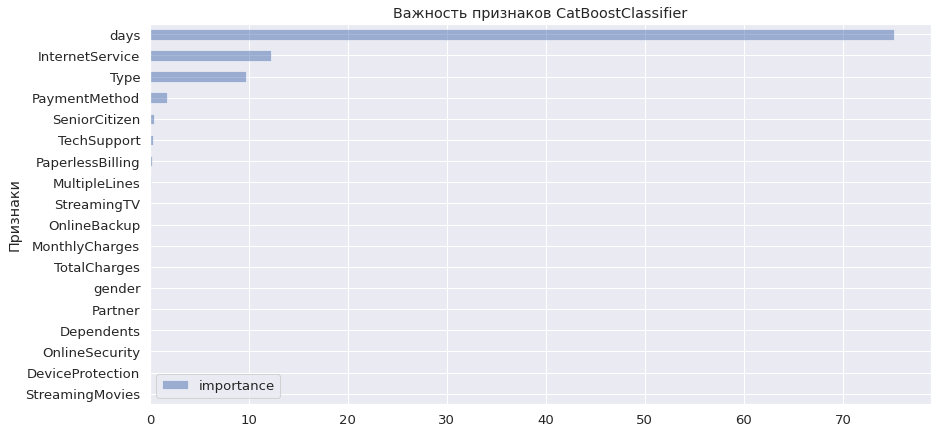

In [35]:
df_feature_importances = pd.DataFrame(
    Grid_cat.best_estimator_.feature_importances_, Grid_cat.best_estimator_.feature_names_).rename(
    columns={0:'importance'}).sort_values(
    by='importance', ascending = False)
df_feature_importances.plot.barh(alpha = .5, figsize = (14,7), grid = True)
plt.title('Важность признаков CatBoostClassifier')
plt.ylabel('Признаки')
plt.gca().invert_yaxis()
plt.show()

В основном модель работает на созданном нами признаке days.Некоторую важность представляют признаки о наличии интернета,типа интернета и способа оплаты.Остальные признаки либо имеют малую важность,либо не учитываются совсем.

Изменим подаваемый дата-сет и проверим на сколько мы можем ускорить процесс не теряя при это качество.

<div class="alert alert-info" role="alert">
V 5   
 
Так понимаю после корректировки лучше продемонстрировать повторное обучение модели?

Когда заказчику важно учитывать время работы модели. На сколько понимаю есть 3 этапа: подбор параметров(самый долгий),обучение(обычно быстрый) и предсказания(самый быстрый). На что должен ориентироваться датасайнтист при предоставлении результа скорости? И от каких примерно значений во времени,обращается внимание на скорость работы?
</div>

<div class="alert alert-success">
<h2> Комментарий тимлида  v.4<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> хороший пункт исследования! Скорость работы очень субъективная характеристика и зависит от задачи и компании. Если в приоритете каечтво и модель переобучается раз в месяц, то на время смотрят так, чтобы оно было адекватное, но за скоростью не гонятся. Если модель работает в режиме реального времени - это уже другой вопрос и здесь подключается аналитика не просто работы модели, но и как и куда ее встраивают и тп. Для данной задачи скорость не является приоритетной.

In [36]:
full_data_binar_main_part = full_data_binar[['EndDate','days','InternetService','Type','PaymentMethod']]
X = full_data_binar_main_part.drop('EndDate',axis=1).astype('str') # Преобразум все float в категории
y = full_data_binar_main_part['EndDate'].astype('int8') 
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 311022,test_size = .25)
cat_features = np.where(X.dtypes != float)[0]

In [37]:
%%time
cat = CatBoostClassifier()
parameters = {'depth'         : [2,6,10],
             'learning_rate' : [0.01,0.03,0.05],
              'iterations'    : [10,50,100],
              'random_seed'  : [311022],
              'loss_function': ['Logloss'],
              'boosting_type' : ['Ordered'],
              'bootstrap_type':['Bernoulli']
             }
Grid_cat = GridSearchCV(estimator=cat, param_grid = parameters, cv = 2, n_jobs=-1)
Grid_cat.fit(X_train, y_train,
            cat_features = cat_features);
best_params_cat = Grid_cat.best_params_ 
print(Grid_cat.best_params_)
print(Grid_cat.best_score_);

0:	learn: 0.6894224	total: 1.56ms	remaining: 14.1ms
1:	learn: 0.6858725	total: 2.83ms	remaining: 11.3ms
2:	learn: 0.6822510	total: 3.89ms	remaining: 9.07ms
3:	learn: 0.6789396	total: 4.9ms	remaining: 7.35ms
4:	learn: 0.6754188	total: 5.88ms	remaining: 5.88ms
5:	learn: 0.6720505	total: 6.82ms	remaining: 4.55ms
6:	learn: 0.6686971	total: 7.73ms	remaining: 3.31ms
7:	learn: 0.6655315	total: 8.73ms	remaining: 2.18ms
8:	learn: 0.6624784	total: 9.66ms	remaining: 1.07ms
9:	learn: 0.6596163	total: 10.6ms	remaining: 0us
0:	learn: 0.6897038	total: 1.49ms	remaining: 13.4ms
1:	learn: 0.6862933	total: 2.5ms	remaining: 9.99ms
2:	learn: 0.6827875	total: 3.57ms	remaining: 8.32ms
3:	learn: 0.6795205	total: 4.54ms	remaining: 6.82ms
4:	learn: 0.6761091	total: 5.44ms	remaining: 5.44ms
5:	learn: 0.6728045	total: 6.39ms	remaining: 4.26ms
6:	learn: 0.6695494	total: 7.32ms	remaining: 3.14ms
7:	learn: 0.6665074	total: 8.39ms	remaining: 2.1ms
8:	learn: 0.6635436	total: 9.38ms	remaining: 1.04ms
9:	learn: 0.660480

<div class="alert alert-info" role="alert">
V 5   

Лог обучения модели можно-же убрать? Вроде убирал с " ; ",но точно не помню а так это сработало
</div>

<div class="alert alert-success">
<h2> Комментарий тимлида  v.3<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> можно с помощью параметра verbose 
    
https://catboost.ai/en/docs/concepts/python-reference_catboost_fit#verbose

In [38]:
pred = Grid_cat.predict(X_test)
accuracy = accuracy_score(y_test,pred)
print('Accuracy:',accuracy)
pred = Grid_cat.predict_proba(X_test)
pred = pred[:, 1]
roc_auc = roc_auc_score(y_test,pred)
print('ROC AUC:',roc_auc)

Accuracy: 0.90386803185438
ROC AUC: 0.9451489854778277


In [39]:
print('Модель обучается на ',round((1 - 17.6 / 25.4)*100),'% быстрее.')
full_data_binar_main_part

Модель обучается на  31 % быстрее.


,EndDate,days,InternetService,Type,PaymentMethod
0,0,31,DSL,Month-to-month,Electronic check
1,0,1036,DSL,One year,Mailed check
2,1,61,DSL,Month-to-month,Mailed check
3,0,1371,DSL,One year,Bank transfer (automatic)
4,1,61,Fiber optic,Month-to-month,Electronic check
...,...,...,...,...,...
7027,0,730,DSL,One year,Mailed check
7028,0,2191,Fiber optic,One year,Credit card (automatic)
7029,0,337,DSL,Month-to-month,Electronic check
7030,1,123,Fiber optic,Month-to-month,Mailed check


## Вывод

-- В ходе выполнения задачи приде

-- Мы загрузили и проверили данные,встретились с неявными пропусками и отсутствием целевого признака.Пропуски убрали, целевой признак создали исходя из данных EndDate.

-- Проанализировали поведение клиентов,построили графики,нашли некоторые закономерности в поведении,на основании них предоставили рекомендации заказчику.

-- Подготовили признаки для обучения моделей, добавили новые и убрали неинформативные. Провели One-Hot Encoding.

-- Обучили 2 модели и оценили их с помощью ROC-кривой, подбор параметров проводили с GridSearchCV и получили следующие результаты: 
    
    -- Площадь ROC-кривой RandomForestClassifier: 0.86
    -- Площадь ROC-кривой CatBoostClassifier:     0.90
-- CatBoostClassifier выбрали как рекомендованную протестировали по метрике Accuracy. Результат по accuracy : 0.9.

    -- Параметры CatBoostClassifier: boosting_type = Ordered', bootstrap_type = Bernoulli, depth = 6, iterations = 100,
       learning_rate = 0.03, loss_function = Logloss = random_seed = 311022.

-- Проанализировали модель,что позволило оптимизировать ускорить и работу модели на 31%.

    -- Итоговые признаки и обработка для обучения модели:
       -- days = количство дней которые клиент пользовался\пользуется услугами,создан из признака EndDate
       -- InternetService,PaymentMethod,PaymentMethod и Type отдельно кодировалась с помощью ohe для модели 
          RandomForestClassifier,в CatBoostClassifier подавались с обозначением категориальных признаков.
      

-- Исходя из анализа поведения клиентов и анализа модели можем порекомендовать:

    --Проверить,все ли корректно работает в способах оплаты,либо добавить новый,более удобный способ дня клиентов.
    --В получнных результатах предсказания ухода клиента, принимать решения исходя из
      того как давно клиент пользуется услугами,пользуется-ли он интернетом и если да то какое у него тип соединения.

<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий тимлида  v.4<a class="tocSkip"></h2>

    
<b>На доработку🤔:</b> теперь к отчету:) 
        
Он должен содержать:
    
1) ответы на вопросы задания из трекера
    
2) перечисление признаков, использованных для обучения
    
3) описание их предобработки
    
4) лучшая модель и ее гиперпараметры
    
5) какие модели были исследованы
    
6) какие признаки оказались важными для финальной модели

Отчет должен быть таким, чтобы по нему можно было воспроизвести проект, не смотря в код

<div class="alert alert-info" role="alert">
V 6   

" ответы на вопросы задания из трекера " -  а где то был трекер с вопросами? 
    
Остальное,чего небыло,вроде добавил.
</div>

<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий тимлида  v.4<a class="tocSkip"></h2>

    
<b>На доработку🤔:</b> при открытии задания на платформе. Я их пропишу - их как раз не хвататет. Предложение о том, все ли шло по плану или что то изменил в ходе работы? Какие были трудности при выполнении проекта?

<div class="alert alert-info" role="alert">
V 6   

Я в тупике.
    
Я не понимаю что от меня,тут требуется.Если оринтировать по своему плану то все шло по плану.Трудности встреченные в ходе проэкта это незнание каких то библиотек,методов и слабые знания в Datascience, остальное в выводе описано как решения и ход работы.
    
Пока что изменил первую строку вывода. От меня требуется что-то контретное ? 
</div>

<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий тимлида  v.5<a class="tocSkip"></h2>

    
<b>На доработку🤔:</b> Подведение итога плана - то есть "Все шло по плану" или "В плане было то-то, но это не пригодилось". Про затружнения все хорошо выше написано

<div style="border:solid Chocolate 2px; padding: 40px">

<h2>✔️ Финальное заключение тимлида: <a class="tocSkip"> </h2> 
    
<b>Александр</b>, за проект ты получаешь 6 sp, поздравляю с получением диплома о новой специальности!!!!<br> 
    
Немного фидбека о твоей работе:
- хорошая аналитическая часть, понятная визуализация и четкие выводы;
- легкочитаемый код - он понятен, с пояснениями и отступами, молодец;
- использование кросс-валидации и нескольких моделей обучения - супер.
   

Рекомендую в дальнейшем изучить пайпланы, обычно для простоты обработки и построения модели используют как раз их, <a href='https://www.helenkapatsa.ru/paiplain/'>про пайплайны</a>, <a href='https://scikit-learn.org/stable/modules/compose.html#pipeline'>руководство пользователя sklearn</a>.
    
Сейчас ты можешь удалить наши с тобой комментарии и добавить себе в портфолио — лучше это сделать в ближайшее время, пока все нюансы еще отложились в памяти.

Далее, хочу добавить некоторые ссылки на полезные ресурсы по машинному обучению:

https://ml-handbook.ru/ онлайн-учебник от Школы анализа данных Яндекса, в котором описаны теоретические основы работы моделей машинного обучения;

https://www.youtube.com/watch?v=xl1fwCza9C8 познавательное видео по настройке модели CatBoost

https://habr.com/ru/company/ods/blog/322626/ на Habr можно закрепить свои знания, порешав задачи из цикла статей — Открытый курс машинного обучения

https://github.com/esokolov/ml-course-hse — на гитхаб есть репозиторий с задачами из курса по машинному обучению от Евгения Соколова, можно использовать как дополнительный материал для закрепления знаний.

https://habr.com/ru/company/avito/blog/571094/ — материалы по A/B тестам.

В некоторых компаниях при устройстве на работу или стажировку, например в Яндексе, нужно решить тест на алгоритмические задачи. По алгоритмам есть много разных курсов, платных и бесплатных. Можно попробовать Тренировки по Алгоритмам от Яндекса https://yandex.ru/yaintern/algorithm-training (бесплатно, хороший курс). Насколько знаю, у Практикума тоже есть курс по алгоритмам.
    
***
    
После окончания финального спринта у нас будет заключительная консультация, где мы сможем подвести итоги и обсудить несколько проектов. Есть возможность выступить перед сокурсиниками со своим проектам в zoom, напиши мне об этом в slack, если есть желание :)
    
Отчет принимаю и до встречи!
    
    
</font>